# Weather Classification with Machine Learning in Python  ☁️❄️🌧️🌞
![Alt text](https://storage.googleapis.com/kaggle-datasets-images/1096724/1844417/738dc0eaa6139c390b8bf0dc4c583268/dataset-cover.jpg?t=2021-01-14-09-13-57)


This notebook is a simple example of how to use the `pandas` library to manipulate data and the `sklearn` library to create a machine learning model.

## Step-1 Loading the dataset

In [23]:
import pandas as pd
df=pd.read_csv("weather_classification_data.csv")


In [24]:
df.head(5)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [25]:
print(df.isnull().sum())
print(df.dtypes)
print(df.describe())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64
Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000        

## Step-2 Preprocessing the dataset



In [26]:
target_var = 'Weather Type'  

# Identifying categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
categorical_vars = categorical_vars[categorical_vars != target_var]  # Exclude target variable from one-hot encoding

# Converting categorical variables to numerical variables
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)


In [27]:
boolean_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[boolean_cols] = df_encoded[boolean_cols].astype(int)



df_encoded.head(5)

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km) Weather Type  Cloud Cover_cloudy  \
0         2              3.5        Rainy                   0   
1         7             10.0       Cloudy                   0   
2         5              5.5        Sunny                   0   
3         7              1.0        Sunny                   0   
4         1              2.5        Rainy                   0   

   Cloud Cover_overcast  Cloud Cover_partly cloudy  Season_Spring  \
0                     0                          1              0   
1                     0                          1              1   
2                     0                          0              1   
3                     0                          0              1   
4                     1                          0              0   

   Season_Summer  Season_Winter  Location_inland  Location_mountain  
0              0              1                1                  0  
1              0              0                1                  0  
2              0              0                0                  1  
3              0              0                0                  0  
4              0              1                0                  1

## Step-3 Normaliztaion and Standardization 

In this step, we will normalize and standardize the data. Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1. Standardization is the process of transforming data into a standard scale.

Also we can use pipeline to combine the normalization and standardization steps. 

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# Identifing numerical columns
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Appling the scaler to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head(5)

# # Here we can also create pipeline for the above steps and use it to transform the data in one go as shown below 
# from sklearn.pipeline import Pipeline

# # Creating a pipeline
# pipeline = Pipeline([
#     ('one_hot_encoding', pd.get_dummies(df, columns=categorical_vars, drop_first=True)),
#     ('scaling', MinMaxScaler())
# ])

# # Applying the pipeline to the data
# df_transformed = pipeline.fit_transform(df)

# df_transformed.head(5)

# Also we can save the pipeline and use it later to transform the data for testing purpose also.

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0     0.291045  0.595506    0.195876           0.752294              0.527951   
1     0.477612  0.853933    0.175258           0.651376              0.529480   
2     0.410448  0.494382    0.144330           0.146789              0.547746   
3     0.470149  0.707865    0.030928           0.752294              0.566614   
4     0.388060  0.606742    0.350515           0.605505              0.477461   

   UV Index  Visibility (km) Weather Type  Cloud Cover_cloudy  \
0  0.142857            0.175        Rainy                   0   
1  0.500000            0.500       Cloudy                   0   
2  0.357143            0.275        Sunny                   0   
3  0.500000            0.050        Sunny                   0   
4  0.071429            0.125        Rainy                   0   

   Cloud Cover_overcast  Cloud Cover_partly cloudy  Season_Spring  \
0                     0                          1              0   
1                     0                          1              1   
2                     0                          0              1   
3                     0                          0              1   
4                     1                          0              0   

   Season_Summer  Season_Winter  Location_inland  Location_mountain  
0              0              1                1                  0  
1              0              0                1                  0  
2              0              0                0                  1  
3              0              0                0                  0  
4              0              1                0                  1

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Apply the scaler to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Check the result
df_encoded.head()

# In this step we are standardizing the data by using StandardScaler. This will make the data to have mean 0 and standard deviation 1. 

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -0.294931  0.212404   -0.048086           0.887629              0.134203   
1     1.143035  1.351385   -0.192836           0.543291              0.150602   
2     0.625367 -0.233285   -0.409962          -1.178401              0.346579   
3     1.085516  0.707613   -1.206089           0.887629              0.549008   
4     0.452811  0.261924    1.037543           0.386773             -0.407490   

   UV Index  Visibility (km) Weather Type  Cloud Cover_cloudy  \
0 -0.520104        -0.582231        Rainy                   0   
1  0.776424         1.345768       Cloudy                   0   
2  0.257813         0.010999        Sunny                   0   
3  0.776424        -1.323769        Sunny                   0   
4 -0.779410        -0.878846        Rainy                   0   

   Cloud Cover_overcast  Cloud Cover_partly cloudy  Season_Spring  \
0                     0                          1              0   
1                     0                          1              1   
2                     0                          0              1   
3                     0                          0              1   
4                     1                          0              0   

   Season_Summer  Season_Winter  Location_inland  Location_mountain  
0              0              1                1                  0  
1              0              0                1                  0  
2              0              0                0                  1  
3              0              0                0                  0  
4              0              1                0                  1

## Step-4 Data visualization 

In this step, we will visualize the data using the `matplotlib` library and the `seaborn` library to understand the data better and to find any patterns in the data that can help us in building the machine learning model later.

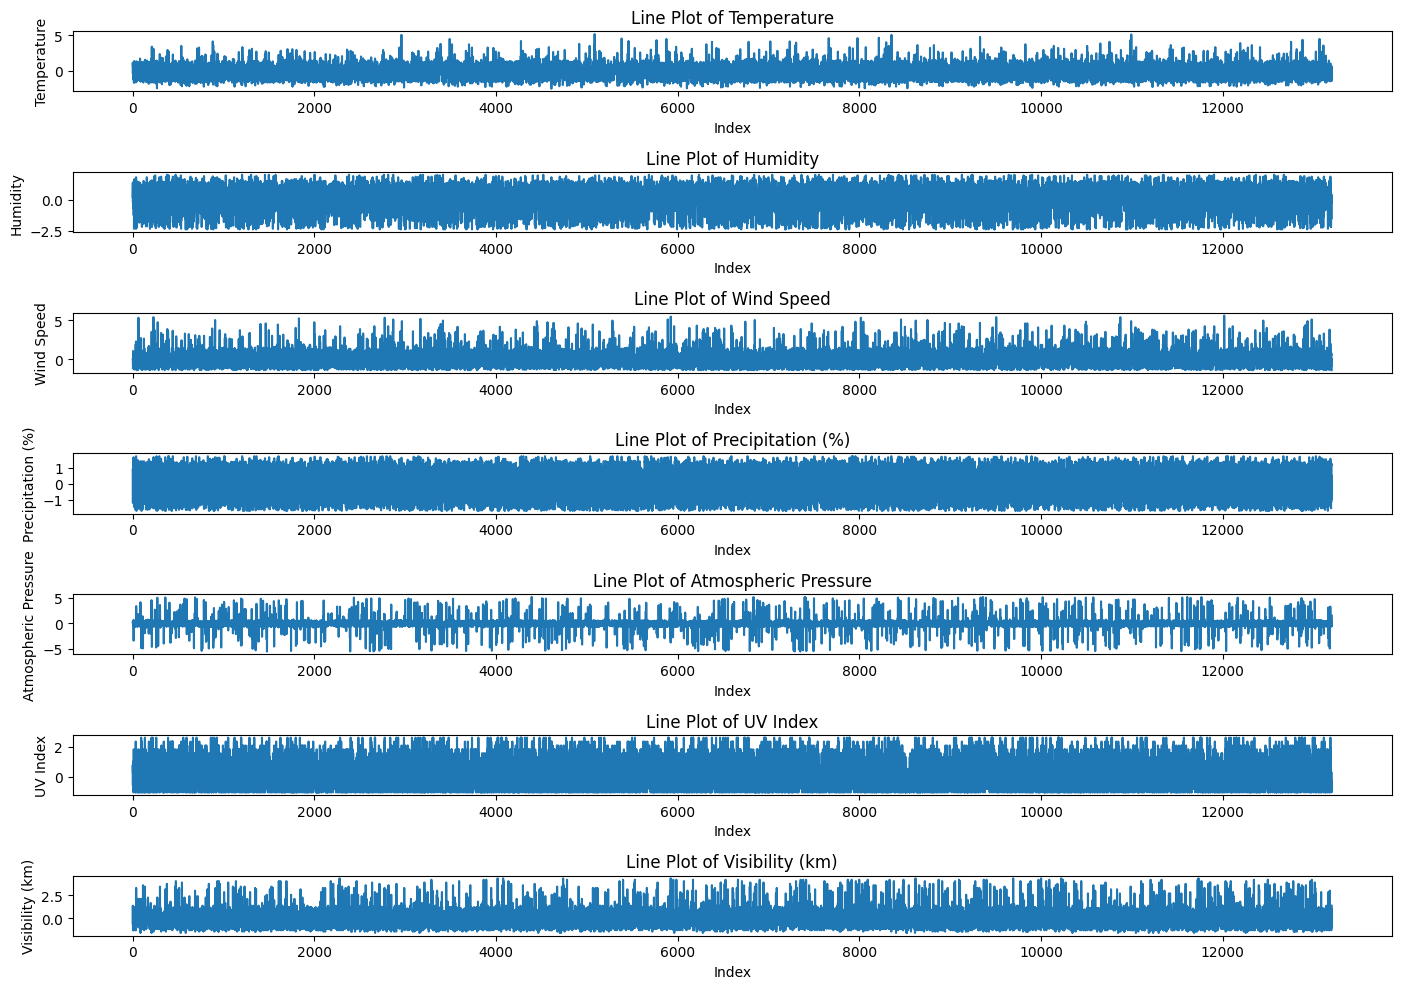

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_line_plots(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    plt.figure(figsize=(14, 10))
    
    # Plot line plots for each numerical column
    for i, column in enumerate(numerical_cols):
        plt.subplot(len(numerical_cols), 1, i + 1)
        plt.plot(df[column])
        plt.title(f'Line Plot of {column}')
        plt.xlabel('Index')
        plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

# Assuming 'df_encoded' is your dataframe
plot_line_plots(df_encoded)

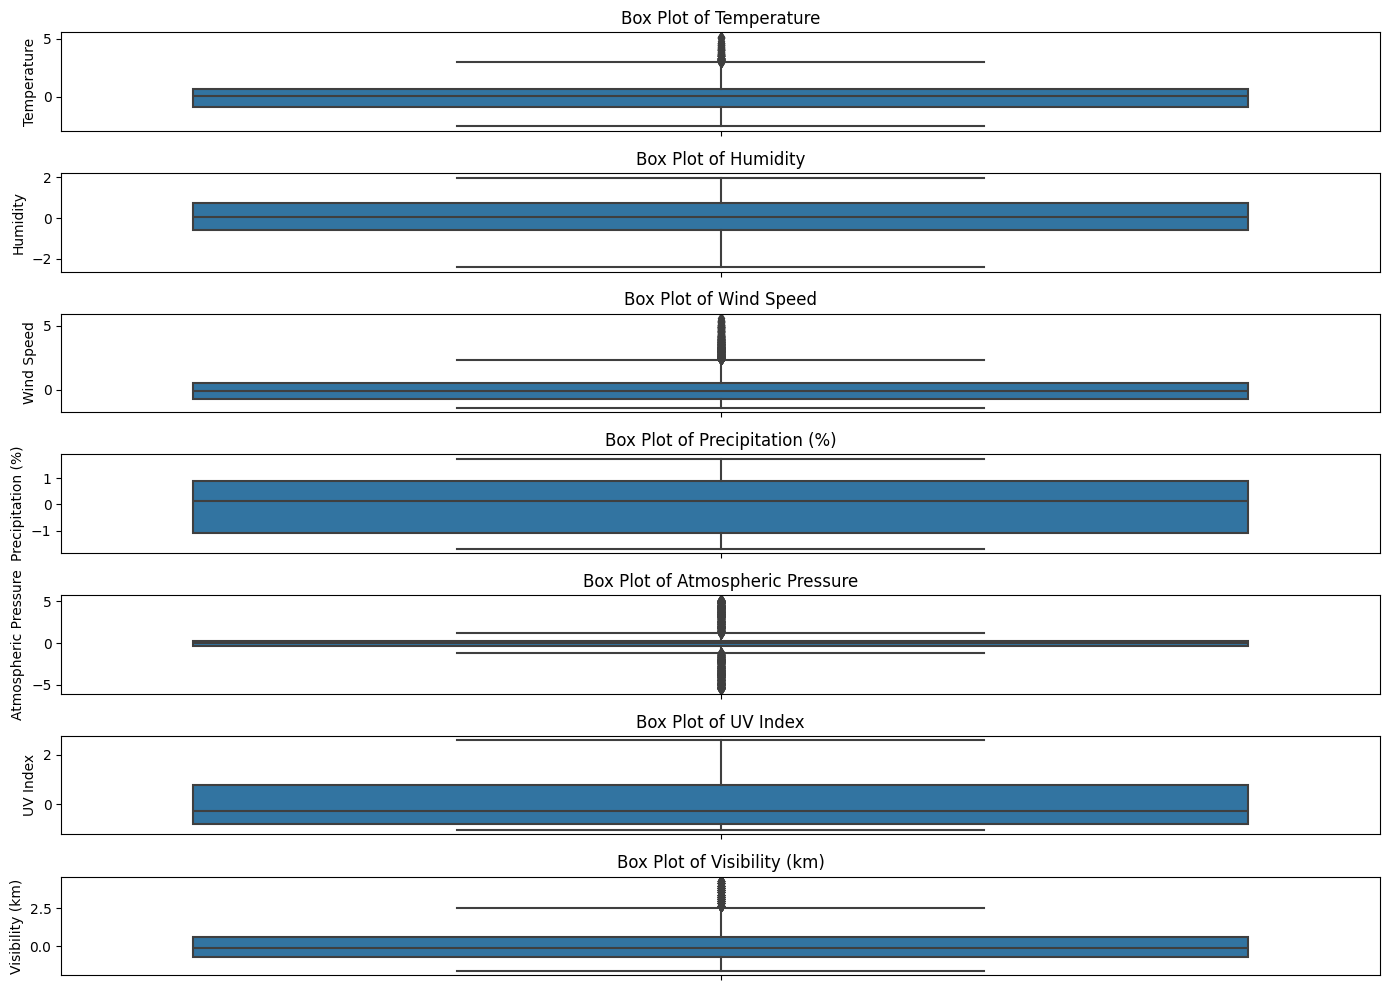

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_plots(df):
    plt.figure(figsize=(14, 10))
    
    # Plot box plots for each numerical column
    for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
        plt.subplot(len(df.select_dtypes(include=['int64', 'float64']).columns), 1, i + 1)
        sns.boxplot(data=df, y=column)
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

# Assuming 'df_encoded' is your dataframe
plot_box_plots(df_encoded)

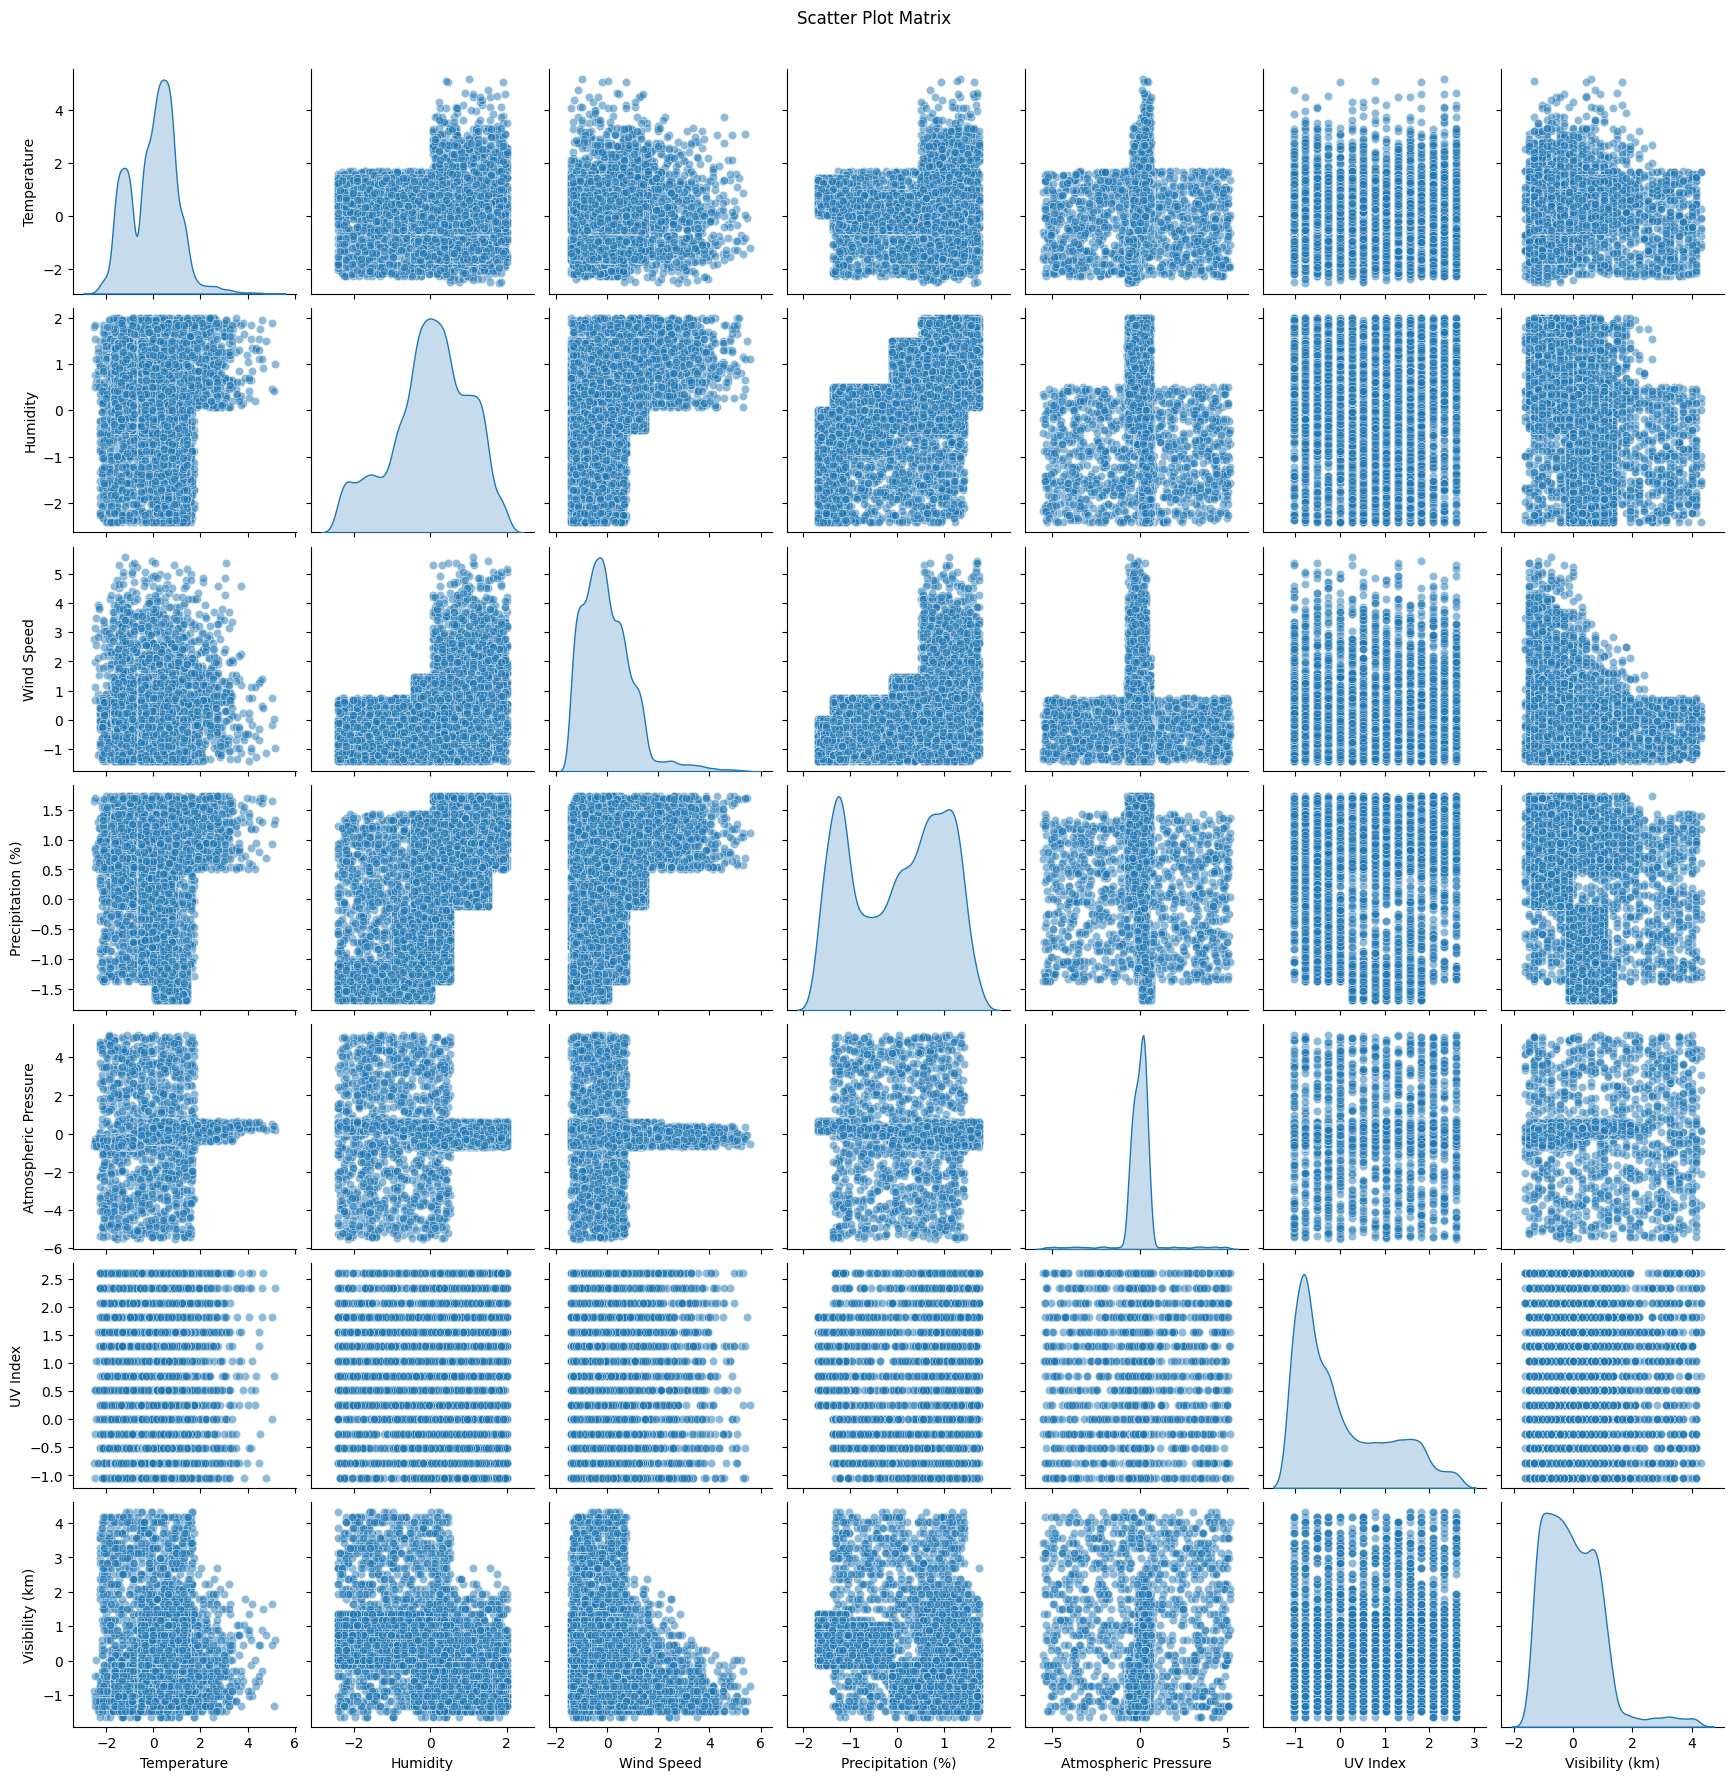

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_matrix(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha':0.5})
    plt.suptitle('Scatter Plot Matrix', y=1.02)
    plt.show()

# Assuming 'df_encoded' is your dataframe
plot_scatter_matrix(df_encoded)

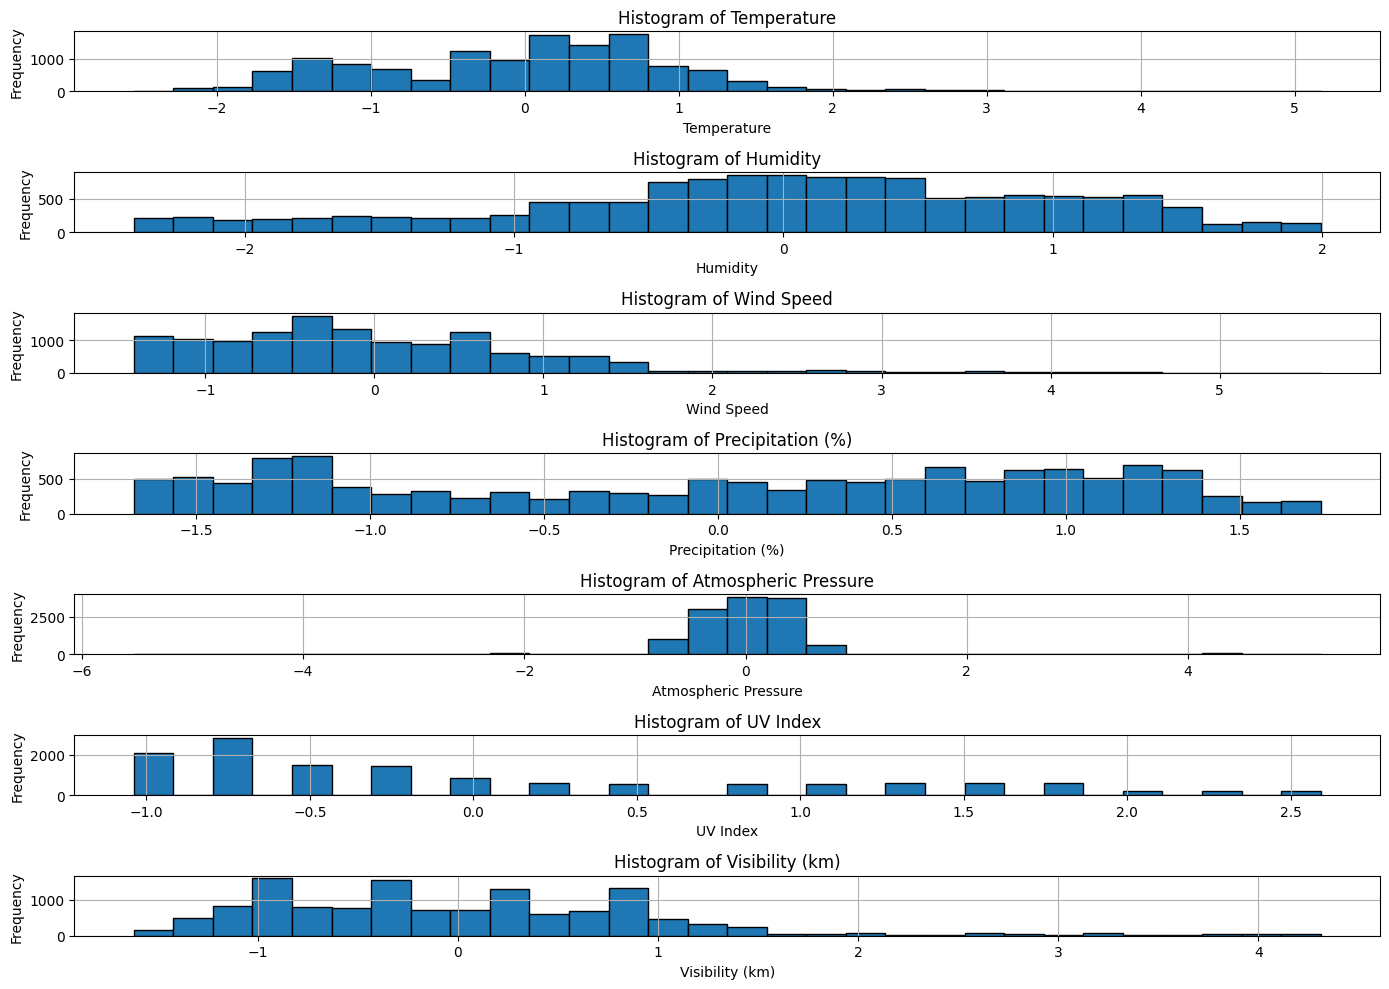

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df):
   
    plt.figure(figsize=(14, 10))
    
    # Plot histograms for each numerical column
    for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
        plt.subplot(len(df.select_dtypes(include=['int64', 'float64']).columns), 1, i + 1)
        df[column].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


plot_histograms(df_encoded)


## Step -5 Splitting dataset for training and testing 

In [33]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop('Weather Type',axis=1)
y=df_encoded['Weather Type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Step-6 Building the machine learning model

Here i have implemented the following machine learning models:
- Logistic Regression
- Random Forest
- Decision Tree


### Applying Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)
y_pred_log_reg = log_model.predict(x_test)



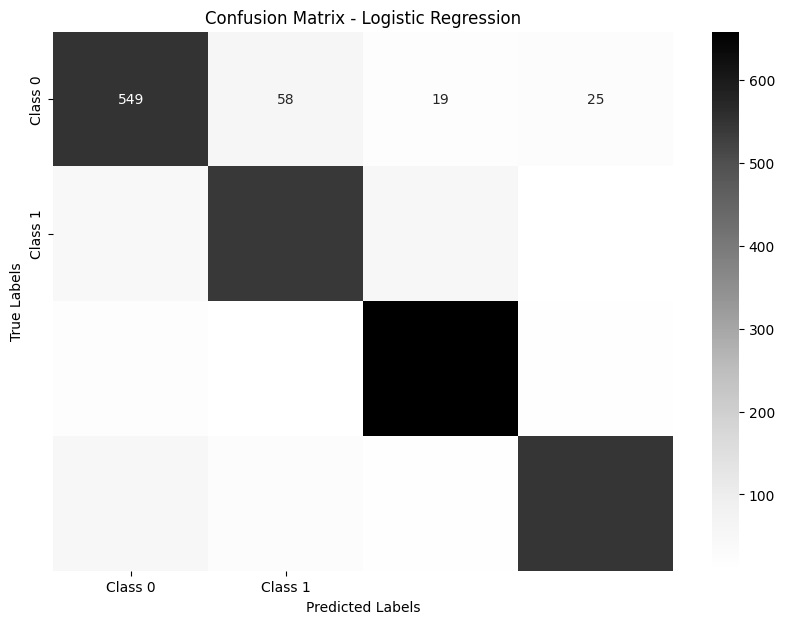

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score      support
Cloudy         0.821856  0.843318  0.832449   651.000000
Rainy          0.856467  0.839258  0.847775   647.000000
Snowy          0.885599  0.938659  0.911357   701.000000
Sunny          0.921008  0.854914  0.886731   641.000000
accuracy       0.870455  0.870455  0.870455     0.870455
macro avg      0.871233  0.869037  0.869578  2640.000000
weighted avg   0.871339  0.870455  0.870338  2640.000000


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred_log_reg)
class_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Convert classification report to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print(f"Accuracy: {accuracy:.2f}")


print("\nClassification Report:")
print(class_report_df)




### Decision Tree Classifier 

In [36]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)



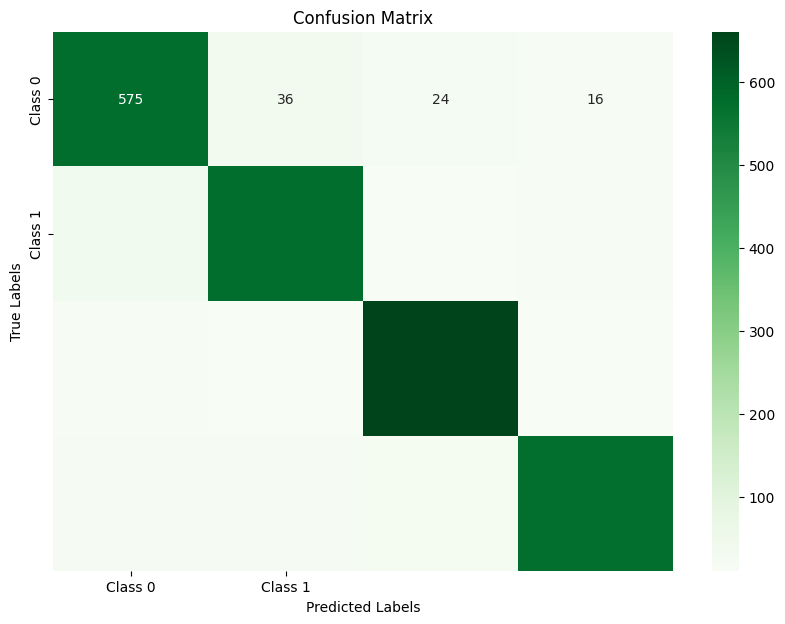

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score      support
Cloudy         0.879205  0.883257  0.881226   651.000000
Rainy          0.897196  0.890263  0.893716   647.000000
Snowy          0.910468  0.942939  0.926419   701.000000
Sunny          0.927184  0.893916  0.910246   641.000000
accuracy       0.903409  0.903409  0.903409     0.903409
macro avg      0.903513  0.902593  0.902902  2640.000000
weighted avg   0.903565  0.903409  0.903333  2640.000000


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred_decision_tree)
class_report = classification_report(y_test, y_pred_decision_tree, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

# Convert classification report to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report_df)




### Random Forest Classifier 

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

y_pred_random_forest = random_forest.predict(x_test)




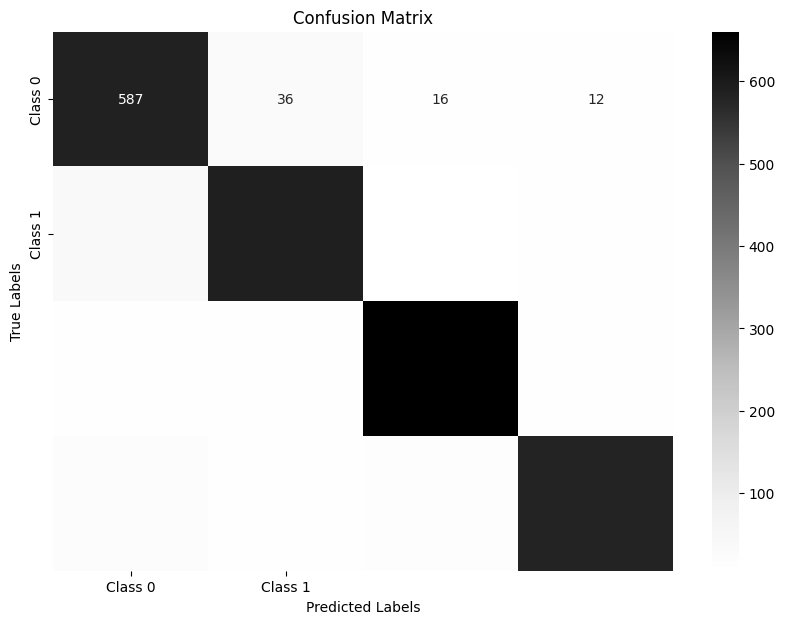

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score      support
Cloudy         0.881381  0.901690  0.891420   651.000000
Rainy          0.902290  0.913447  0.907834   647.000000
Snowy          0.942857  0.941512  0.942184   701.000000
Sunny          0.940226  0.907956  0.923810   641.000000
accuracy       0.916667  0.916667  0.916667     0.916667
macro avg      0.916689  0.916151  0.916312  2640.000000
weighted avg   0.917117  0.916667  0.916786  2640.000000


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_random_forest)
class_report = classification_report(y_test, y_pred_random_forest, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

# Convert classification report to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(class_report_df)




### Reasons for Choosing These Models

- Logistic Regression: It is a simple and easy-to-understand algorithm that is used for binary classification problems. It is a good starting point for building a machine learning model.

- Decision Tree Classifier: It is a non-linear model that can capture complex relationships in the data. It is also easy to interpret and visualize, which can help in understanding how the model is making predictions.

- Random Forest Classifier: It is an ensemble model that combines multiple decision trees to improve the performance of the model. It is known for its high accuracy and ability to handle large datasets with high dimensionality.



### Models comparison:

All the models have been trained and tested on the same dataset. The accuracy of the models is as follows:

- Logistic Regression: 0.87
- Decision Tree Classifier: 0.90
- Random Forest Classifier: 0.92

The Random Forest Classifier has the highest accuracy among the three models, so it is the best model for this dataset.


